# Reading csv dataset file with Pandas

In [47]:
print("It is Saturday")

It is Saturday


In [48]:
import pandas as pd

In [49]:
from pandas import read_csv

## Upload Data

In [50]:
df = pd.read_csv("us_states_pop2018.csv")

In [51]:
df.head()

,Rank,State,2018 Population,2018 Growth,% of US
0,1,California,39776830,0.006075,0.121259
1,2,Texas,28704330,0.014123,0.087505
2,3,Florida,21312211,0.015622,0.064970
3,4,New York,19862512,0.000661,0.060550
4,5,Pennsylvania,12823989,0.001441,0.039094


In [52]:
df.tail(10)

,Rank,State,2018 Population,2018 Growth,% of US
41,42,Maine,1341582,0.004248,0.004090
42,43,Montana,1062330,0.011268,0.003238
43,44,Rhode Island,1061712,0.001956,0.003237
44,45,Delaware,971180,0.009607,0.002961
45,46,South Dakota,877790,0.009342,0.002676
46,47,North Dakota,755238,-0.000205,0.002302
47,48,Alaska,738068,-0.002334,0.002250
48,49,District of Columbia,703608,0.013885,0.002145
49,50,Vermont,623960,0.000486,0.001902
50,51,Wyoming,573720,-0.009658,0.001749


Why did we only want to display the first 5 rows of the dataframe?

What if we wanted to see the size of this dataframe?

In [53]:
# number of rows
len(df)

51

In [54]:
# shape of df (rows, columns)
df.shape

(51, 5)

## Change Column Name(s)

Why would we want to change the column names?

In [55]:
df = df.rename(columns={'2018 Population': '2018 Pop'})
df.head()

,Rank,State,2018 Pop,2018 Growth,% of US
0,1,California,39776830,0.006075,0.121259
1,2,Texas,28704330,0.014123,0.087505
2,3,Florida,21312211,0.015622,0.064970
3,4,New York,19862512,0.000661,0.060550
4,5,Pennsylvania,12823989,0.001441,0.039094


## Create New Columns

Let's create new columns for the information we extracted from those values.

In [196]:
print(df["% of US"][0:8])
Pct = [(people * 100) for people in df["% of US"]]
df["Pct_USA"] = Pct
df.head()

0    0.121259
1    0.087505
2    0.064970
3    0.060550
4    0.039094
5    0.038924
6    0.035651
7    0.032147
Name: % of US, dtype: float64


,Rank,State,2018 Population,2018 Growth,% of US,Pct_USA
0,1,California,39776830,0.006075,0.121259,12.125884
1,2,Texas,28704330,0.014123,0.087505,8.750455
2,3,Florida,21312211,0.015622,0.064970,6.496983
3,4,New York,19862512,0.000661,0.060550,6.055045
4,5,Pennsylvania,12823989,0.001441,0.039094,3.909366


## Drop Columns

In [57]:
df = df.drop("% of US", axis = 1)
#Check if it dropped
df.head()

,Rank,State,2018 Pop,2018 Growth,Pct_USA
0,1,California,39776830,0.006075,12.125884
1,2,Texas,28704330,0.014123,8.750455
2,3,Florida,21312211,0.015622,6.496983
3,4,New York,19862512,0.000661,6.055045
4,5,Pennsylvania,12823989,0.001441,3.909366


In [58]:
aa = (df["Pct_USA"].max())
print(aa)

12.125883740009954


In [78]:
#print(df['State'] == 'Pennsylvania')
df.loc[df['State'] == 'Pennsylvania']

,Rank,State,2018 Pop,2018 Growth,Pct_USA
4,5,Pennsylvania,12823989,0.001441,3.909366


In [61]:
array = ['Florida', 'Ohio']
df.loc[df['State'].isin(array)]

,Rank,State,2018 Pop,2018 Growth,Pct_USA
2,3,Florida,21312211,0.015622,6.496983
6,7,Ohio,11694664,0.003093,3.565094


In [80]:
big_states = df['Pct_USA'] > 8
#print(big_states)
df.loc[big_states]

,Rank,State,2018 Pop,2018 Growth,Pct_USA
0,1,California,39776830,0.006075,12.125884
1,2,Texas,28704330,0.014123,8.750455


In [81]:
df[big_states]

,Rank,State,2018 Pop,2018 Growth,Pct_USA
0,1,California,39776830,0.006075,12.125884
1,2,Texas,28704330,0.014123,8.750455


# Question 1: Can we find states with fastest 2018 growth?

In [89]:
# Your code here
fg = (df["2018 Growth"].max())
state = df[df["2018 Growth"]==fg]
print(state["State"])

38    Idaho
Name: State, dtype: object


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

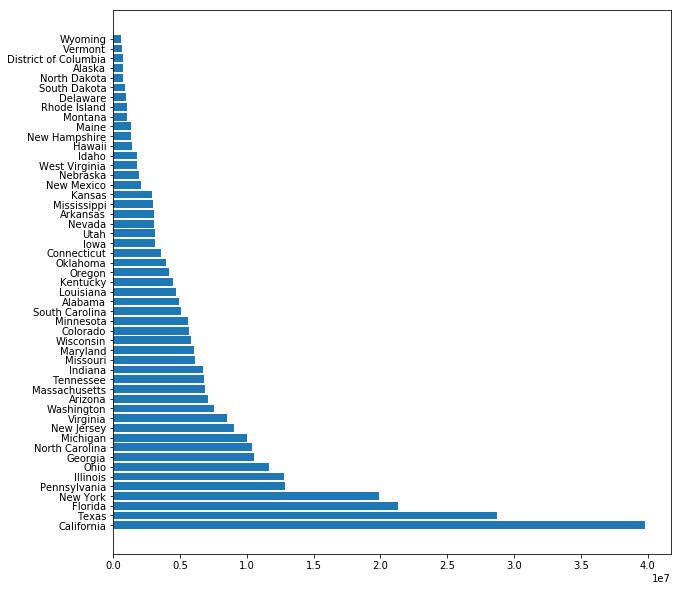

In [103]:
plt.figure(figsize=(10,10)) 
plt.barh(df["State"],df["2018 Pop"])
#plt.grid(True)
plt.show()

# Question 2: Plot growth rate on vertical bar chart

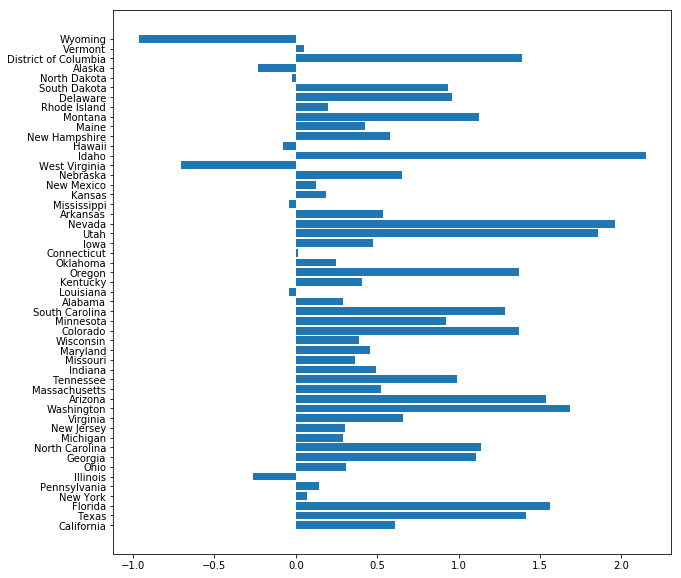

In [121]:
# Your code here ... (x-axis is state name, y-axis is growth rate in percentage)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.barh(df["State"],df["2018 Growth"]*100)
plt.show()

# Pie charts ...

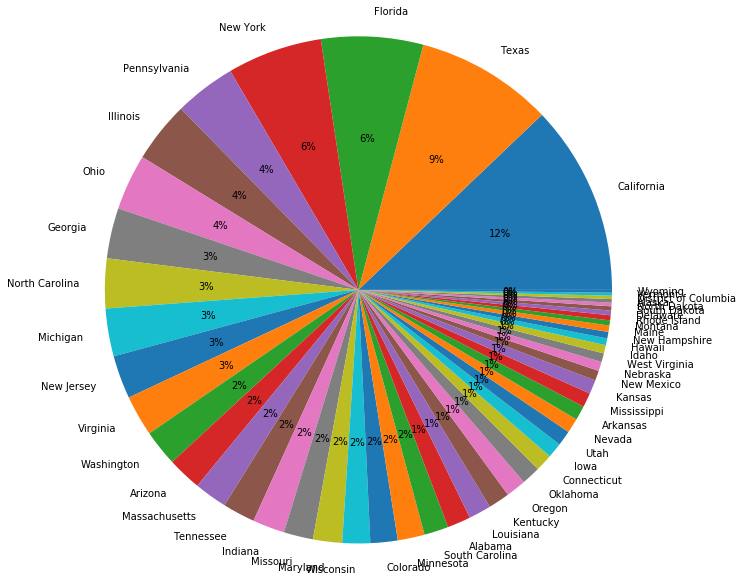

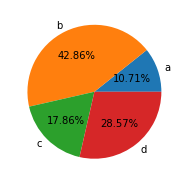

In [140]:
ffffffffffffff, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(df['Pct_USA'],labels=df['State'], autopct='%1.0f%%',startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.axis('equal')
values = [3, 12, 5, 8] 
labels = ['a', 'b', 'c', 'd'] 
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.show()

# Question 3: a) Play with startangle, b) highlight California by using explode to remove the slice.

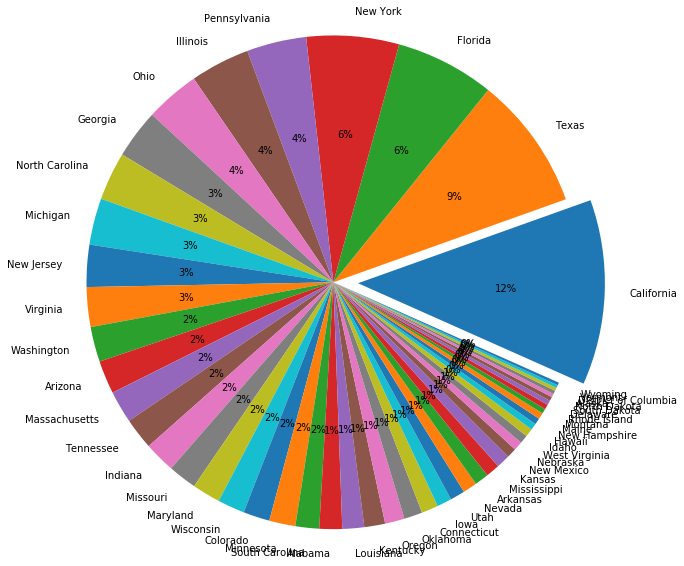

In [163]:
ffffffffffffff, ax1 = plt.subplots(figsize=(10, 10))
explode = [0]*51
explode[0] = 0.1
ax1.pie(df['Pct_USA'],labels=df['State'], explode=explode, autopct='%1.0f%%',startangle=-24)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Question 4: From the "2018 Pop" column, find the following a) Find total USA population, b) find average, c) find median

In [188]:
# Your code here ...
pop_2018 = df["2018 Pop"]
total = pop_2018.sum()
num = len(pop_2018)
ave = pop_2018.mean()
med = pop_2018.median()
print(" total USA population       ", total)
print(" average of USA population  ", round(ave, 1))
print(" median of USA population   ", med)

 total USA population        328032421
 average of USA population   6432008.3
 median of USA population    4472265.0


# Question 5: write df to csv file using Pandas. This csv file should have new column Pct_USA.

In [202]:
# Your code here ...
import pandas as pd
from pandas import read_csv
df = pd.read_csv("us_states_pop2018.csv")
df.head(3)
Pct_USA = df["% of US"] * 100
df["Pct_USA"] = Pct
df.to_csv('us_states_pop2018_new.csv')
df = pd.read_csv("us_states_pop2018_new.csv")
df.head(3)

,Unnamed: 0,Rank,State,2018 Population,2018 Growth,% of US,Pct_USA
0,0,1,California,39776830,0.006075,0.121259,12.125884
1,1,2,Texas,28704330,0.014123,0.087505,8.750455
2,2,3,Florida,21312211,0.015622,0.064970,6.496983
